In [1]:
import token
import sys
import numpy as np
import matplotlib as plt
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from PIL import Image
import colorsys


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Starting Execution
Original Image : 


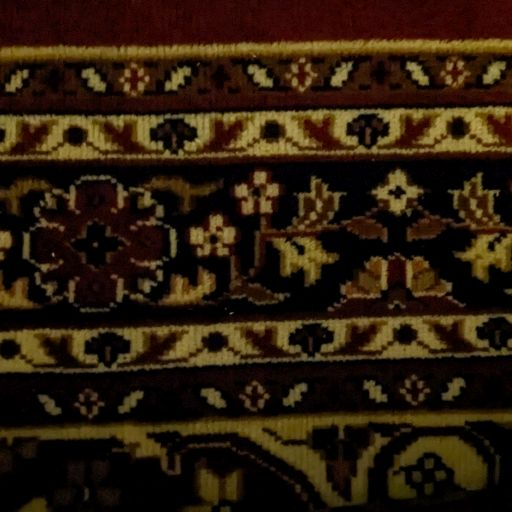

512 512
After Histogram Specification transform


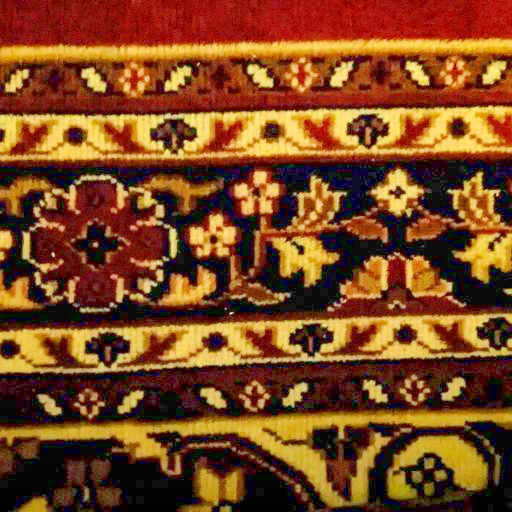

Original Image : 


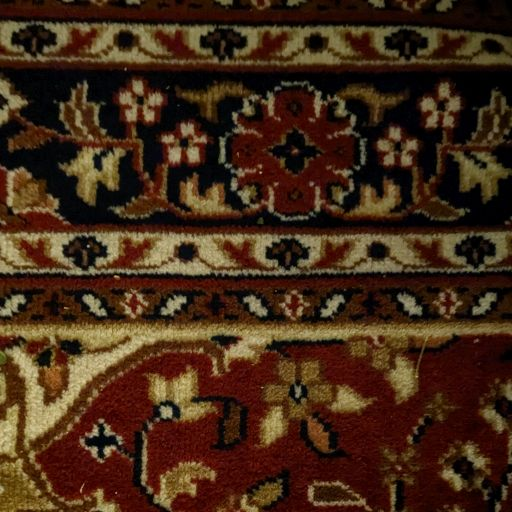

512 512
After Histogram Specification transform


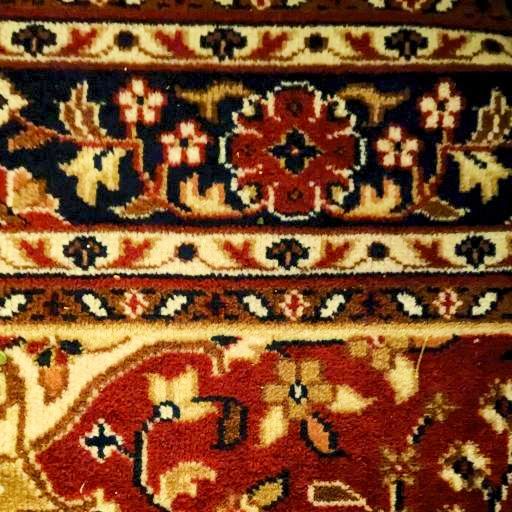

In [37]:
np.set_printoptions(edgeitems=1000)
np.set_printoptions(linewidth=8000)

def getVectors(newImage):
    a, b = newImage.shape
    print(a, b)
    new_arr = np.zeros([5, (a * b)])
    new_arro = np.zeros([1, (a * b)])
    Histi = np.zeros([256, 2])
    Histo = np.zeros([256, 2])
    Histi = getHist(newImage, a, b)
    

    Hist_to_return = Histi.copy()

    for i in range(a):
        for j in range(b):
            k = int(newImage[i, j])
            Histi[k, 1] -= 1
            s = int(Histi[k, 1])
            new_arr[0, s] = k
            new_arr[1, s] = i
            new_arr[2, s] = j
    Histout = Hist_out(newImage, a, b)
    sum = 0
    val = 0
    for i in range(256):
        temp = int(Histout[i, 0])
        for j in range(sum, sum + temp):
            new_arro[0, j] = int(val)
        val = val + 1
        sum = sum + temp
    new_arr [3,:] = new_arro
    return new_arr,Hist_to_return,Histout

def getHist(grayImage, a, b):
    Hist = np.zeros([256, 2])
    for i in range(a):
        for j in range(b):
            k = int(grayImage[i, j])
            Hist[k, 0] = Hist[k, 0] + 1
    sum = 0
    #cummulative histogram
    for i in range(0, 256):
        Hist[i, 1] = sum + Hist[i, 0]
        sum = Hist[i, 1]
    return Hist

def Hist_out (grayImage, a,b) :
    Hist = np.zeros([256, 2])
    val = int((a*b)/256)
    for i in range (256):
        Hist[i,0] = val
    sum = 0
    for i in range (0,256):
        Hist[i,1] = sum + Hist[i,0]
        sum = Hist[i,1]
    return Hist

def getEqualityConstraint (arrvali,input_histogram):
    avg_old = 0
    for i in range (0,256):
        if i == 0:
            imin = 0
            max = int(input_histogram[i,1])
        else :
            imin = int(input_histogram[i-1,1])
            max = int(input_histogram[i,1])
        sum_new = 0
        for j in range (imin,max):
            sum_new = sum_new+arrvali[3,j]
        pixel_values = max-imin
        if pixel_values!=0:
            avg = round(sum_new/(max-imin))
            avg_old = avg
        else:
            # Handling division by 0 error. Such pixels wont be considered anyways in the reconstruction of the image
            avg = avg_old
        #print(i,imin, max, pixel_values, sum_new ,avg)
        for k in range (imin,max):
            arrvali[4,k]= avg
    return arrvali

def processImages(imageInput, imageOutput):
    print("Original Image : ")
    cv2_imshow(imageInput)
    converted = cv.cvtColor(imageInput,cv.COLOR_RGB2HSV)

    cv.imwrite('Gray_level.jpg', converted[:, :, 2])
    arrvali,input_histogram, output_histogram = getVectors(converted[:, :, 2])

    final = getEqualityConstraint(arrvali,input_histogram)
    #print ("The Array of row 3 and row 4 of the final matrix are same : " ,np.array_equal(final[3,:],final[4,:]))
    print("After Histogram Specification transform:")
    a, b, c = imageInput.shape
    g = np.zeros([a, b])
    h = np.zeros([a, b])
    v = np.zeros([a,b])
    for k in range(a * b):
        row = int(arrvali[1, k])
        column = int(arrvali[2, k])
        g[row, column] = int(final[3, k])
        h[row,column] = int(final[4,k])

    cv.imwrite("FinalImage_gray_with_monotonical_transformation.jpg", g)
    cv.imwrite("Final_gray_Image_with_equality_constraint.jpg",h)

    h = converted[:, :, 0]
    s = converted[:, :, 1]
    converted[:,:,2] = g
    v = converted[:,:,2]
    hsv_image = cv.merge([h, s, v])
    rgb_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2RGB)
    cv.imwrite("Final_RGB_image_with_monotonical.jpg", rgb_image)
    cv2_imshow(rgb_image)
    converted[:, :, 2] = h
    v2 = converted[:, :, 2]
    hsv_image2 = cv.merge([h,s,v2])
    rgb_image2 = cv.cvtColor(hsv_image2,cv.COLOR_HSV2RGB)
    cv.imwrite("Final_RGB_image_with_equality.jpg", rgb_image2)
    return


def main():
    print('Starting Execution')
    img_i1 =cv.imread('/content/drive/My Drive/DIP-ESE558/Project1/Image1.jpg')
   
    img_inputHist =cv.imread('/content/drive/My Drive/DIP-ESE558/Project1/Medium-light-img3-512.jpg')
    processImages(img_i1, img_inputHist)
    img_i2 =cv.imread('/content/drive/My Drive/DIP-ESE558/Project1/Low-light-img2-512.jpg')
    processImages(img_i2, img_inputHist)
main()